In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [53]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [54]:
X['subscribed'] = y

#### Dataset Analysis:

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
X.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


Lets examine each column one by one. First visualize numerical features and then turn to categorical features.

#### Feature Analysis:

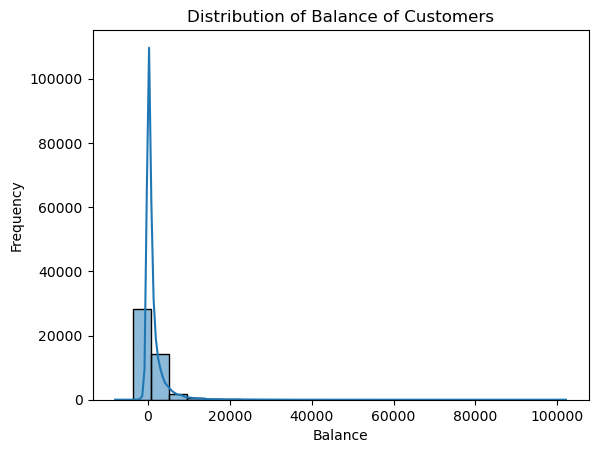

In [58]:
# Create a histogram using histplot
sns.histplot(X['balance'], bins=25, kde=True)
# Add labels and title
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance of Customers')
plt.show()
# Findings: it is pretty skewed. Data need normalization.

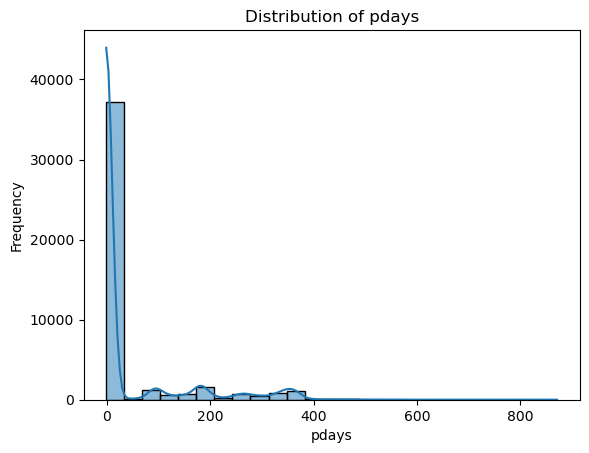

In [59]:
sns.histplot(X['pdays'], bins=25, kde=True)
# Add labels and title
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Distribution of pdays')
plt.show()
# Data doesnt look normally distributed, moreoever it has outliers.

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


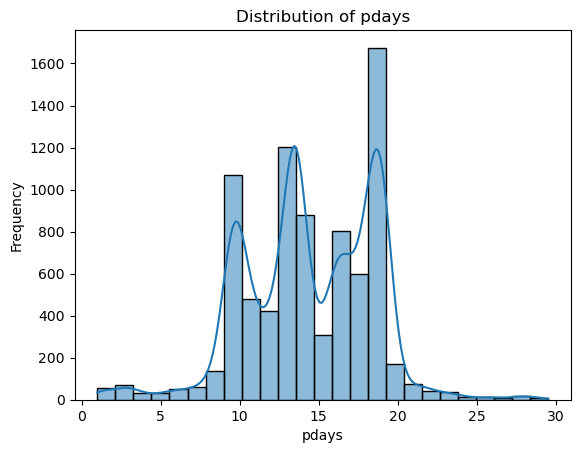

In [60]:
sns.histplot(np.sqrt(X['pdays']), bins=25, kde=True)
# Add labels and title
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Distribution of pdays')
plt.show()
# Data doesnt look normally distributed, moreoever it has outliers.

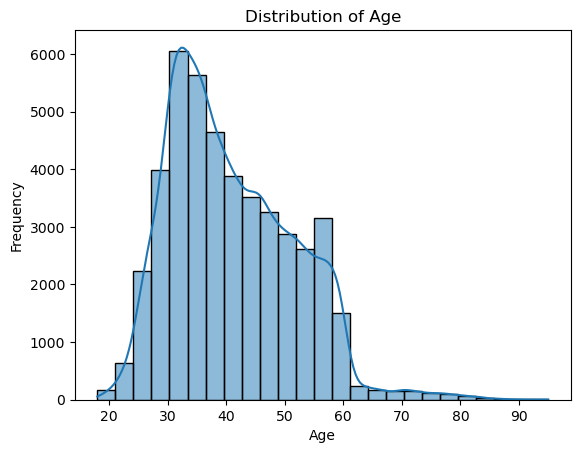

In [61]:
sns.histplot(X['age'], bins=25, kde=True)
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
# data looks normally distributed.

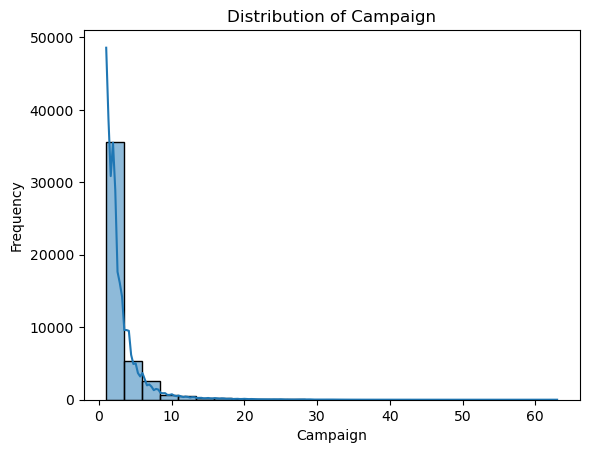

In [62]:
sns.histplot(X['campaign'], bins=25, kde=True)
# Add labels and title
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Distribution of Campaign')
plt.show()
# Data is pretty skewed and have outliers.

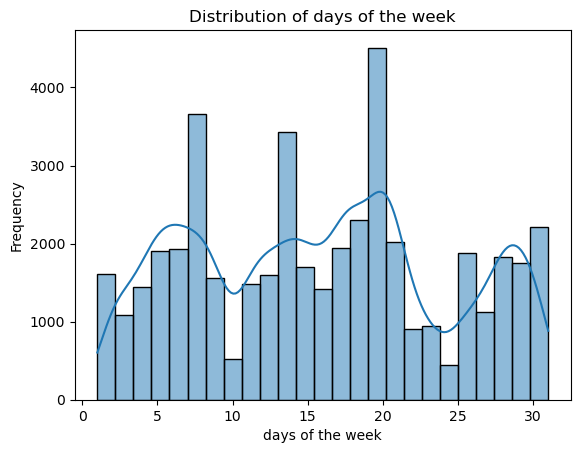

In [63]:
sns.histplot(X['day_of_week'], bins=25, kde=True)
plt.xlabel('days of the week')
plt.ylabel('Frequency')
plt.title('Distribution of days of the week')
plt.show()

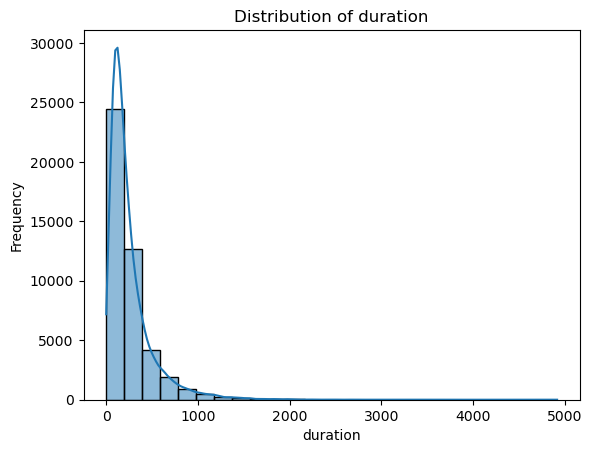

In [64]:
sns.histplot(X['duration'], bins=25, kde=True)
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Distribution of duration')
plt.show()
# The is ksewed.

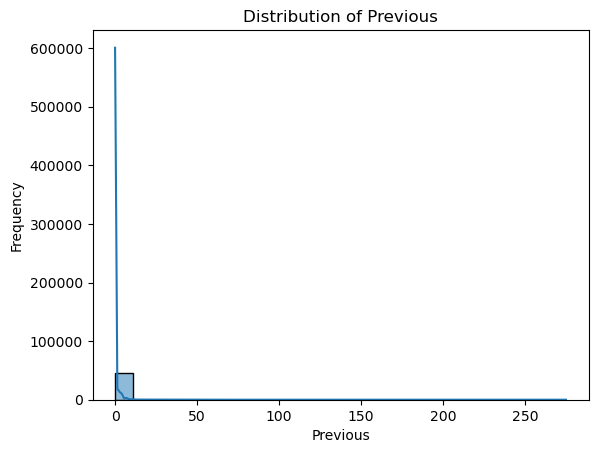

In [65]:
sns.histplot(X['previous'], bins=25, kde=True)
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.title('Distribution of Previous')
plt.show()
# The data is skewed and has outliers.

From the above plots, it is evident that almost all the numerical columns need normalization.

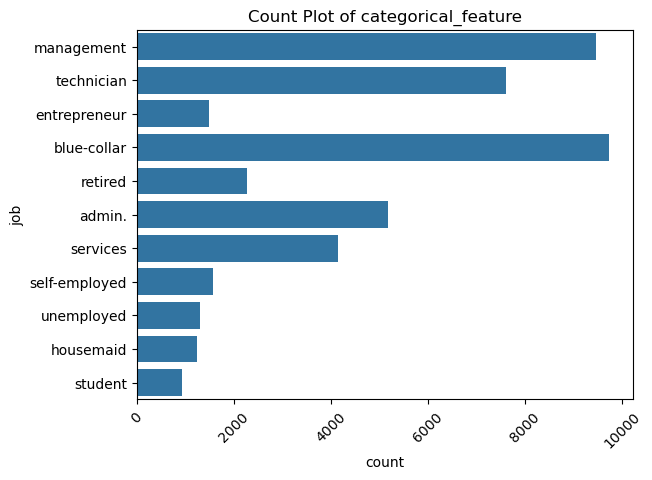

In [66]:
sns.countplot(X['job'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

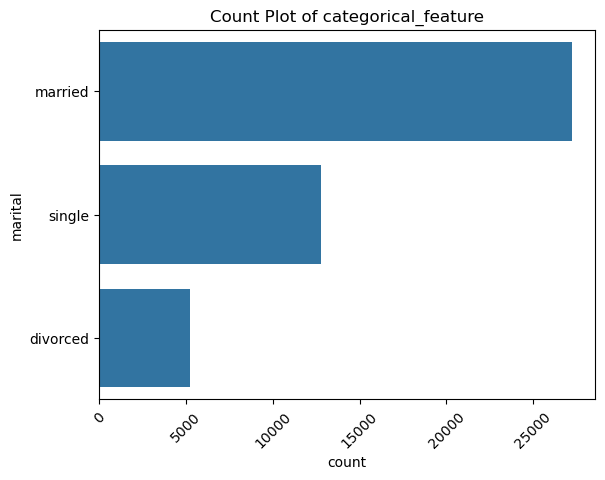

In [67]:
sns.countplot(X['marital'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

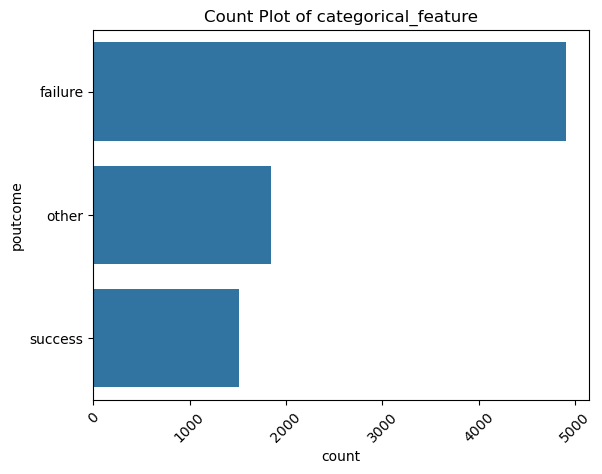

In [68]:
sns.countplot(X['poutcome'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

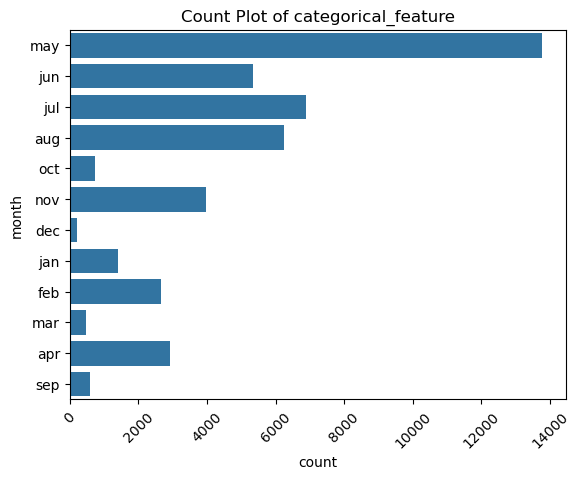

In [69]:
sns.countplot(X['month'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

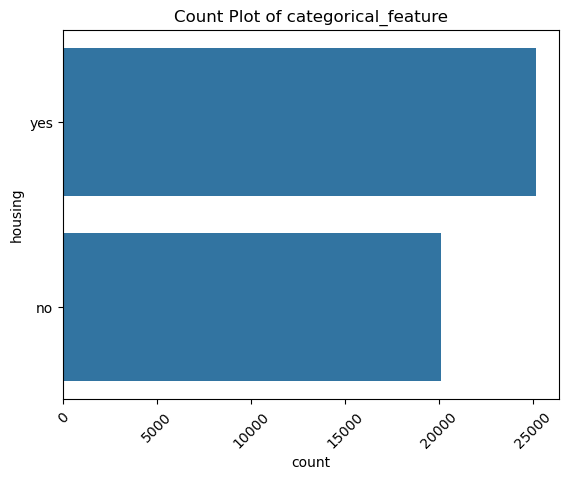

In [70]:
sns.countplot(X['housing'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

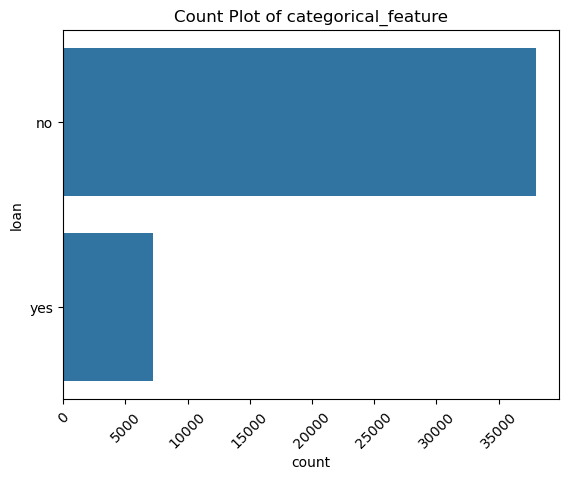

In [71]:
sns.countplot(X['loan'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

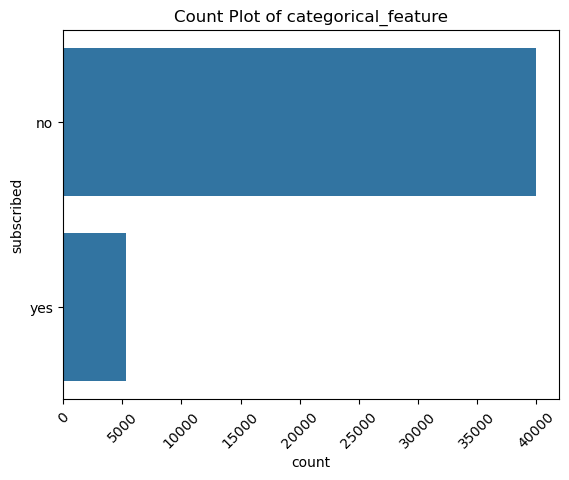

In [72]:
sns.countplot(X['subscribed'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()
# The data is imbalance as the subscrubed is a target variable.

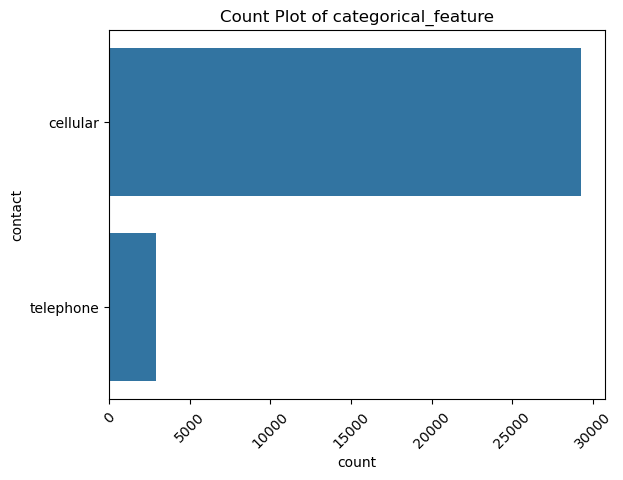

In [73]:
sns.countplot(X['contact'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

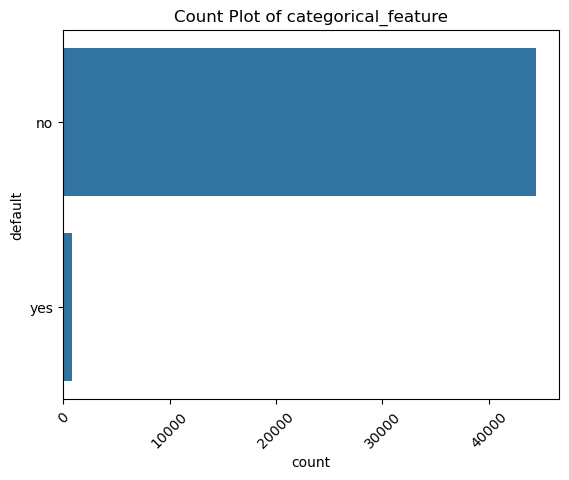

In [74]:
sns.countplot(X['default'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

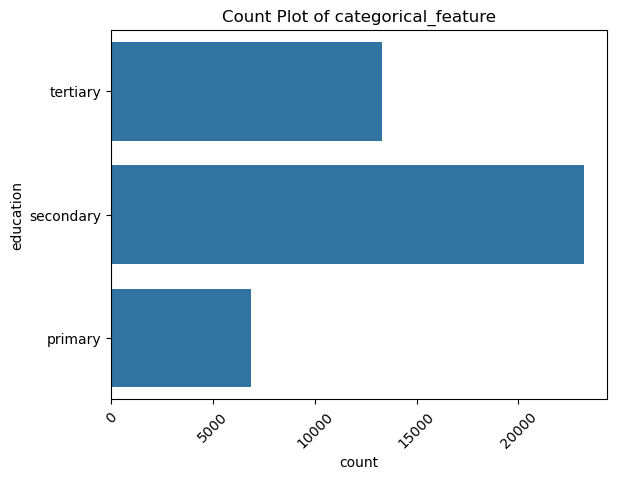

In [75]:
sns.countplot(X['education'])
plt.title('Count Plot of categorical_feature')
plt.xticks(rotation=45)
plt.show()

#### Checking the Baseline:

In [76]:
X['subscribed'].value_counts(normalize=True)

subscribed
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

#### Filling of the Null Values:

After investigating the each feature, it is time to normalize nd encode the data.


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [78]:
df_temp = X.copy()
df_temp = df_temp.dropna()
df_temp.info()
# After dropping all the null values of all columns, the data has reduced significanlty. That indicates that each
# columns has a null entry where rest of the features have some values. So dropping nan is not a good idea.
# Upon investigation it seemed that outcome has the highest count of null, so fill all those null with 'unknown'.

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
 16  subscribed   7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [79]:
X.isna().sum()
# That shows that only categorical features has nan values, so fill all the na with unknown.

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
subscribed         0
dtype: int64

In [80]:
X.fillna('unknown', inplace=True)
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Correction of the feature names and values:

In [81]:
X.rename(columns = {'poutcome' : 'outcome'}, inplace=True)
X.replace('admin.', 'admin', inplace=True)

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  outcome      45211 non-null  object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Addition of a new column based on the values of pdays:

In [83]:
X['customer_type'] = X.pdays.apply(lambda x: 'new' if x == -1 else 'old')

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   day_of_week    45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration       45211 non-null  int64 
 12  campaign       45211 non-null  int64 
 13  pdays          45211 non-null  int64 
 14  previous       45211 non-null  int64 
 15  outcome        45211 non-null  object
 16  subscribed     45211 non-null  object
 17  customer_type  45211 non-null  object
dtypes: int64(7), object(11)
me

#### Implementation of Logistic Regression with auto values of hyperparameters:

Two implementation has done, 1 with all the features without transformation, second time after transforming the
balance feature according to log transformation.

In [85]:
non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')

In [86]:
data = X.drop(columns={'subscribed'}, axis=1)
target = X['subscribed']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.02, random_state=42)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44306 entries, 33780 to 15795
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            44306 non-null  int64 
 1   job            44306 non-null  object
 2   marital        44306 non-null  object
 3   education      44306 non-null  object
 4   default        44306 non-null  object
 5   balance        44306 non-null  int64 
 6   housing        44306 non-null  object
 7   loan           44306 non-null  object
 8   contact        44306 non-null  object
 9   day_of_week    44306 non-null  int64 
 10  month          44306 non-null  object
 11  duration       44306 non-null  int64 
 12  campaign       44306 non-null  int64 
 13  pdays          44306 non-null  int64 
 14  previous       44306 non-null  int64 
 15  outcome        44306 non-null  object
 16  customer_type  44306 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.1+ MB


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=3000))    # Logistic regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


Lets try to implement a model using Logistic regression but applying the lognp1 transformation on the balance
feature 1 and then passing it through the pipeline.

In [90]:
df_new = X.copy()
df_new['balance'] = np.log1p(df_new['balance'])
#df_new['pdays'] = np.sqrt(df_new['pdays'])
#df_new['pdays'].fillna(np.mean(df_new['pdays']), inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [91]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,outcome,subscribed,customer_type
0,58,management,married,tertiary,no,7.670429,yes,no,unknown,5,may,261,1,-1,0,unknown,no,new
1,44,technician,single,secondary,no,3.401197,yes,no,unknown,5,may,151,1,-1,0,unknown,no,new
2,33,entrepreneur,married,secondary,no,1.098612,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,new
3,47,blue-collar,married,unknown,no,7.317876,yes,no,unknown,5,may,92,1,-1,0,unknown,no,new
4,33,unknown,single,unknown,no,0.693147,no,no,unknown,5,may,198,1,-1,0,unknown,no,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,6.716595,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,new
45207,71,retired,divorced,primary,no,7.455877,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,new
45208,72,retired,married,secondary,no,8.651025,no,no,cellular,17,nov,1127,5,184,3,success,yes,old
45209,57,blue-collar,married,secondary,no,6.505784,no,no,telephone,17,nov,508,4,-1,0,unknown,no,new


In [92]:
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41495 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41495 non-null  int64  
 1   job            41495 non-null  object 
 2   marital        41495 non-null  object 
 3   education      41495 non-null  object 
 4   default        41495 non-null  object 
 5   balance        41495 non-null  float64
 6   housing        41495 non-null  object 
 7   loan           41495 non-null  object 
 8   contact        41495 non-null  object 
 9   day_of_week    41495 non-null  int64  
 10  month          41495 non-null  object 
 11  duration       41495 non-null  int64  
 12  campaign       41495 non-null  int64  
 13  pdays          41495 non-null  int64  
 14  previous       41495 non-null  int64  
 15  outcome        41495 non-null  object 
 16  subscribed     41495 non-null  object 
 17  customer_type  41495 non-null  object 
dtypes: float64(

In [93]:
data = df_new.drop(columns={'subscribed'}, axis=1)
target = df_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.02, random_state=42)

In [94]:
non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')
num_list.remove('balance')
#num_list.remove('pdays')

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=3000))    # Logistic regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


#### Impelentation of Different Classifiers through GridSearchCV with cv=5: 1, testsize = 80/20 : With transformed balance column through log1p transformation 2: With original balance column:

GridSeachCV with five classifiers, cv-5, tansformed balance column:

In [96]:

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}


# Define hyperparameter grids for each model
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter' : [3000]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }

}


In [97]:
# Create an empty list to hold the best models
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}')
    
# Evaluate best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of best {model_name} on test set: {accuracy:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for LogisticRegression: {'classifier__C': 10.0, 'classifier__max_iter': 3000, 'classifier__solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.90
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'classifier__C': 10.0, 'classifier__gamma': 'scale'}
Best cross-validation score for SVC: 0.90
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Bes

GridSeachCV with five classifiers, cv-5, original balance column:

In [98]:
# GridSearchCv with diffrent models without the logtransformation of the balance feature.
data = X.drop(columns={'subscribed'}, axis=1)
target = X['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.02, random_state=42)

non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')



# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}


# Define hyperparameter grids for each model
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter' : [3000]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }

}


# Create an empty list to hold the best models
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}')

# Evaluate best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of best {model_name} on test set: {accuracy:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for LogisticRegression: {'classifier__C': 0.1, 'classifier__max_iter': 3000, 'classifier__solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.91
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'classifier__C': 10.0, 'classifier__gamma': 'auto'}
Best cross-validation score for SVC: 0.91
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best c

#### Impelentation of Different Classifiers through GridSearchCV with cv=5: 1, testsize = 70/30 : With transformed balance column through log1p transformation 2: With original balance column:

Without transformed balance feature:

In [99]:
# First without the log transformed data.
data = X.drop(columns={'subscribed'}, axis=1)
target = X['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.03, random_state=42)

non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')



# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}


# Define hyperparameter grids for each model
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter' : [3000]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }

}


# Create an empty list to hold the best models
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}')

# Evaluate best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of best {model_name} on test set: {accuracy:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for LogisticRegression: {'classifier__C': 1.0, 'classifier__max_iter': 3000, 'classifier__solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.91
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for SVC: {'classifier__C': 10.0, 'classifier__gamma': 'auto'}
Best cross-validation score for SVC: 0.91
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best cross-validation score for KNN: 0.90
Accuracy of best LogisticRegression on test set: 0.89
Accuracy of best RandomForest on test set: 0.90
Accuracy of best DecisionTree on test set: 0.90
Accuracy of best SVC on test set: 0.90
Accuracy of best KNN on test set: 0.90


With transformed balance feature:

In [100]:
# Now lets try with the log transformed data.
df_new = X.copy()
df_new['balance'] = np.log1p(df_new['balance'])
df_new.dropna(inplace=True)

data = df_new.drop(columns={'subscribed'}, axis=1)
target = df_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.03, random_state=42)

non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')
num_list.remove('balance')

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}


# Define hyperparameter grids for each model
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter' : [3000]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }

}


# Create an empty list to hold the best models
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}')

# Evaluate best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of best {model_name} on test set: {accuracy:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Best parameters for LogisticRegression: {'classifier__C': 1.0, 'classifier__max_iter': 3000, 'classifier__solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.90
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.90
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'classifier__C': 10.0, 'classifier__gamma': 'scale'}
Best cross-validation score for SVC: 0.90
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best cross-validation score for KNN: 0.89
Accuracy of best LogisticRegression on test set: 0.90
Accuracy of best RandomForest on test set: 0.91
Accuracy of best DecisionTree on test set: 0.90
Accuracy of best SVC on test set: 0.89
Accuracy of best KNN on test set: 0.90


#### Visualization of the results:

According to the above implementation, the models that performed best are DecisionTreeClassifer, SVC, and
the RandomForestClassifiers with the accuracy score of .91 and test split size of 80/20 and the feature balance of the dataset has been transformed by the logp1.
Lets try to visualize the results of these models from different perspective.
1: Feature Importance
2: Confusion Matrix

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


The model LogisticRegression(max_iter=3000, solver='liblinear') does not have feature importance option.


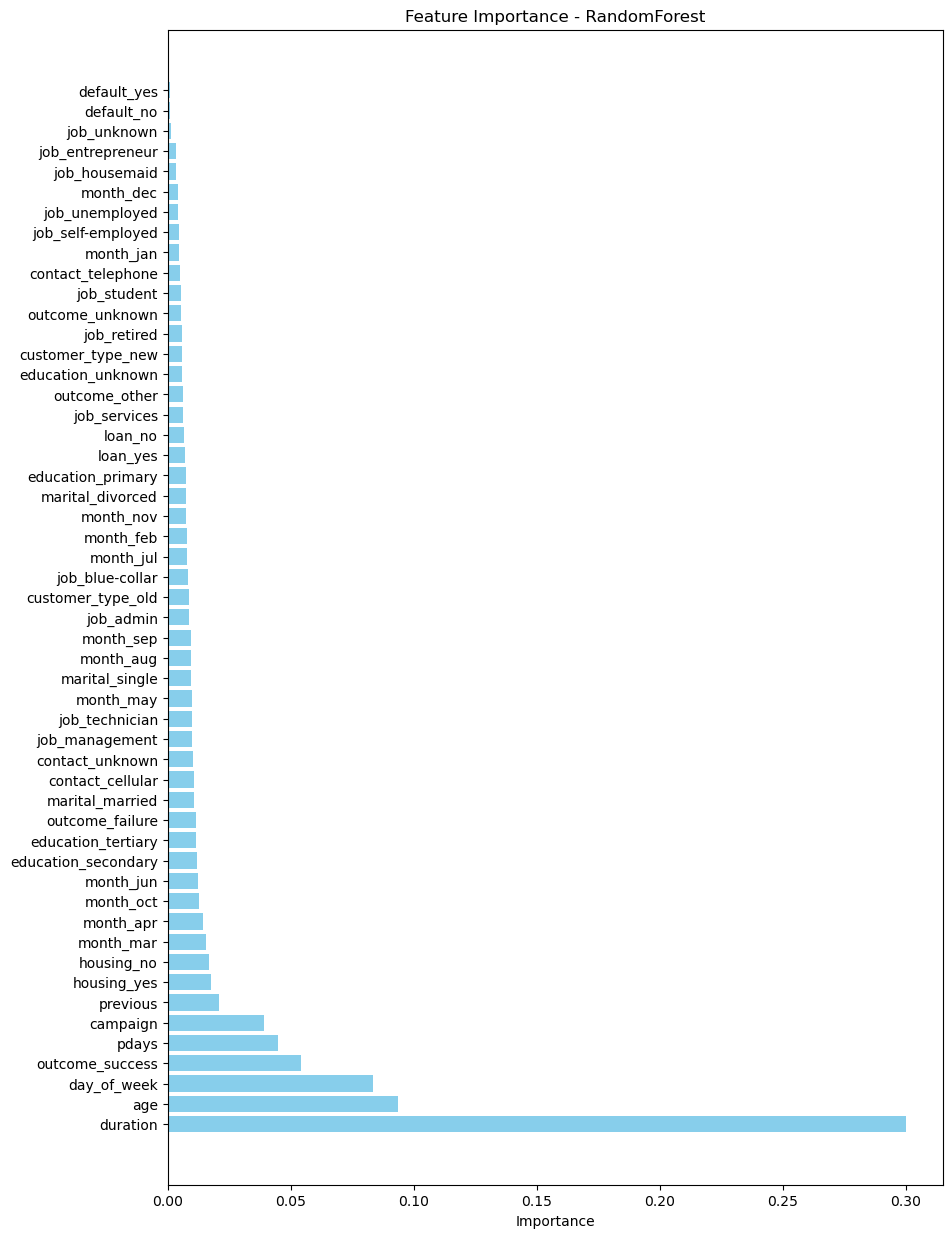

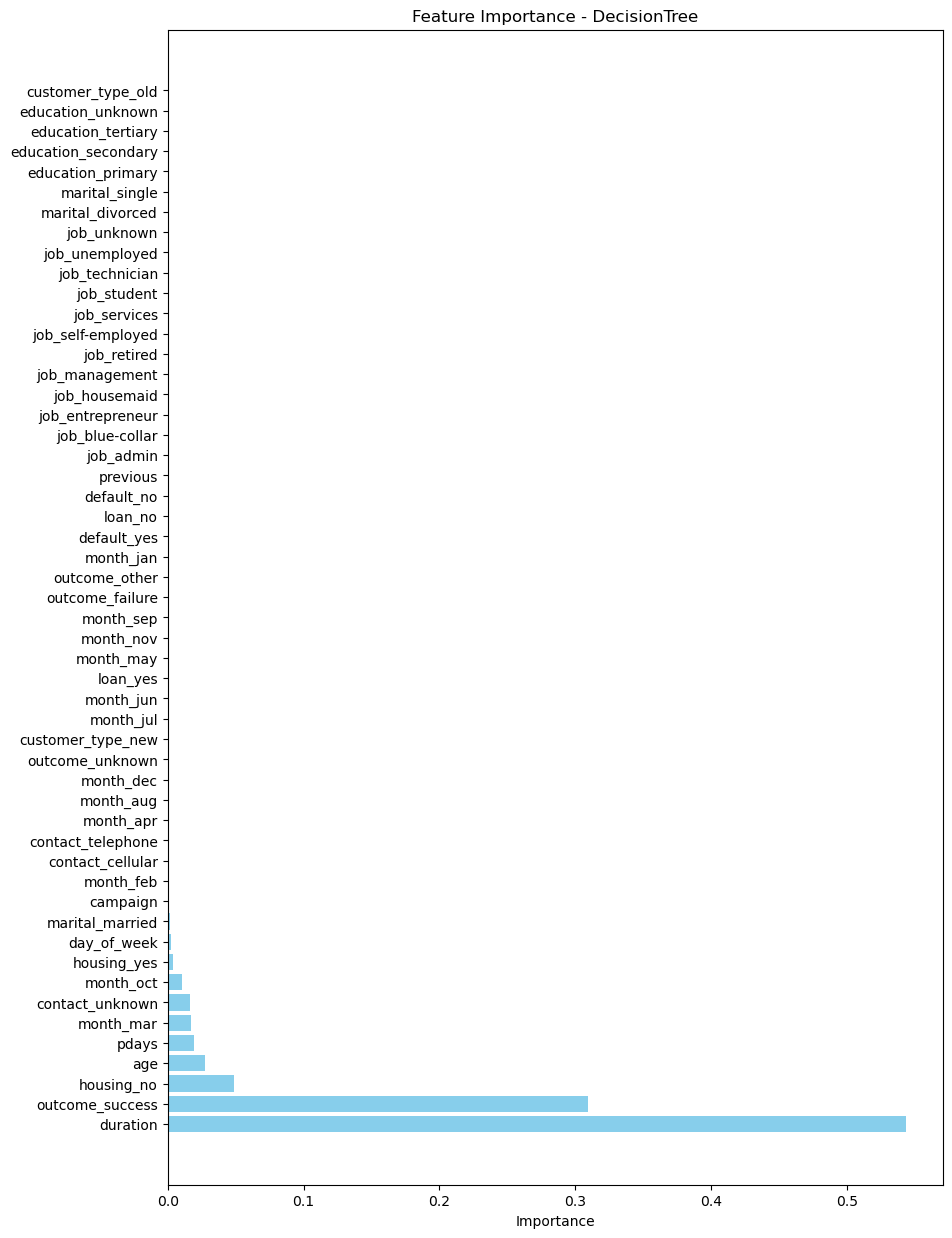

The model KNeighborsClassifier() does not have feature importance option.
The model SVC(C=10, gamma='auto') does not have feature importance option.


In [101]:
# Feature Imoortance
# Now lets try with the log transformed data.
df_new = X.copy()
df_new['balance'] = np.log1p(df_new['balance'])
df_new.dropna(inplace=True)

data = df_new.drop(columns={'subscribed'}, axis=1)
target = df_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.02, random_state=42)

non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')
num_list.remove('balance')

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(C=1.0, solver='liblinear', max_iter=3000),
    'RandomForest': RandomForestClassifier(max_depth=20),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, min_samples_split=2),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(C=10, gamma='auto')
}




# Function to plot feature importance
def plot_feature_importance(model_name, importances, feature_names):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 15))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.show()

# Create an empty list to hold the best models
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    pipeline.fit(X_train, y_train)
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        print('The model', model,  'does not have feature importance option.')
        continue
        
    num_features = pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out(input_features=num_list).tolist()
    cat_features = list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=non_num_list))
    feature_names = num_features + cat_features

    # Plot feature importances
    plot_feature_importance(model_name, importances, feature_names)


Accuracy of LogisticRegression on test set: 0.91

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       736
         yes       0.73      0.34      0.46        94

    accuracy                           0.91       830
   macro avg       0.82      0.66      0.71       830
weighted avg       0.90      0.91      0.90       830



/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 600x400 with 0 Axes>

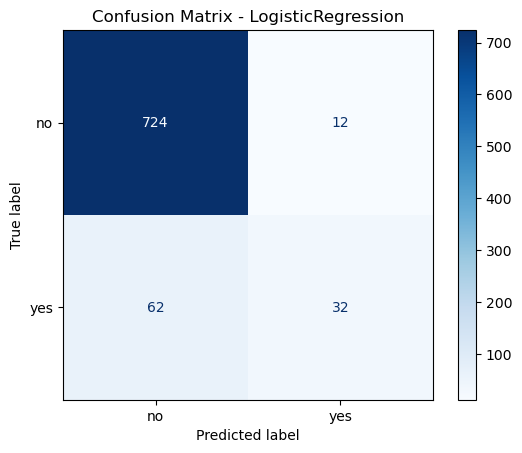

/var/folders/90/59xrx649681ff4_fhrkjcf6h0000gn/T/ipykernel_50273/3495395887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


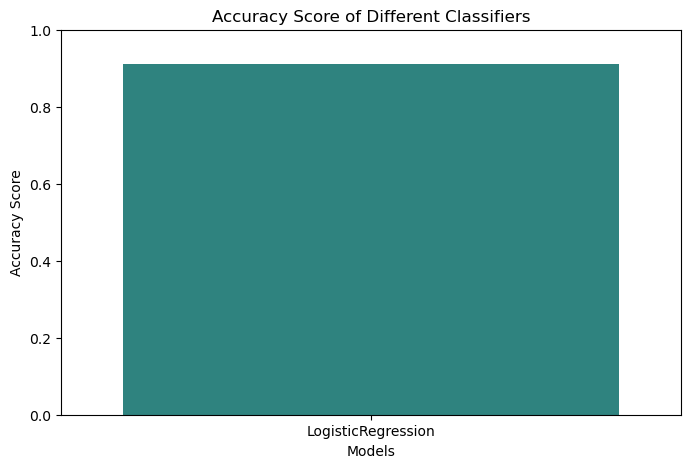

Accuracy of RandomForest on test set: 0.91

Classification Report for RandomForest:

              precision    recall  f1-score   support

          no       0.93      0.98      0.95       736
         yes       0.69      0.38      0.49        94

    accuracy                           0.91       830
   macro avg       0.81      0.68      0.72       830
weighted avg       0.90      0.91      0.90       830



<Figure size 600x400 with 0 Axes>

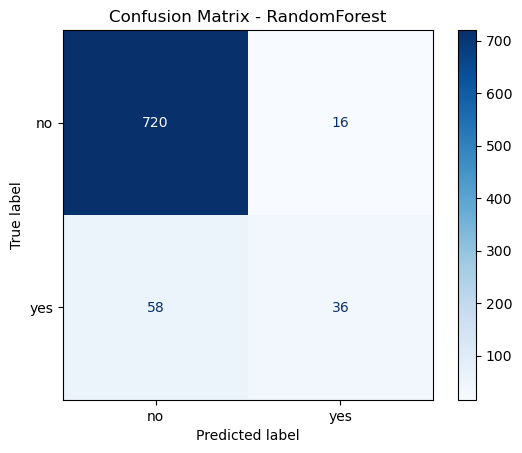

/var/folders/90/59xrx649681ff4_fhrkjcf6h0000gn/T/ipykernel_50273/3495395887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


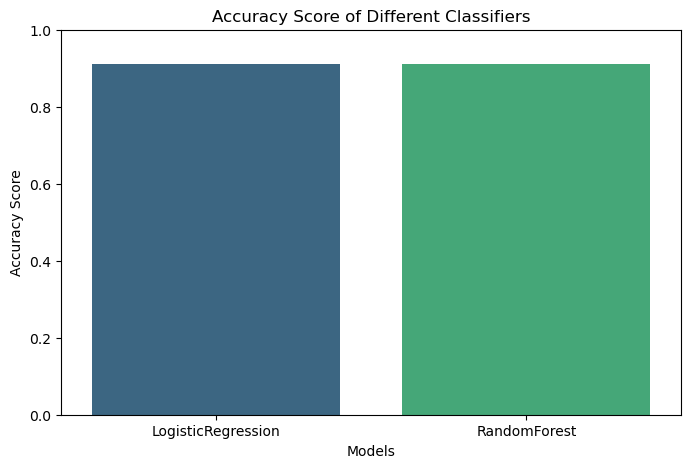

Accuracy of DecisionTree on test set: 0.90

Classification Report for DecisionTree:

              precision    recall  f1-score   support

          no       0.92      0.97      0.95       736
         yes       0.62      0.33      0.43        94

    accuracy                           0.90       830
   macro avg       0.77      0.65      0.69       830
weighted avg       0.89      0.90      0.89       830



<Figure size 600x400 with 0 Axes>

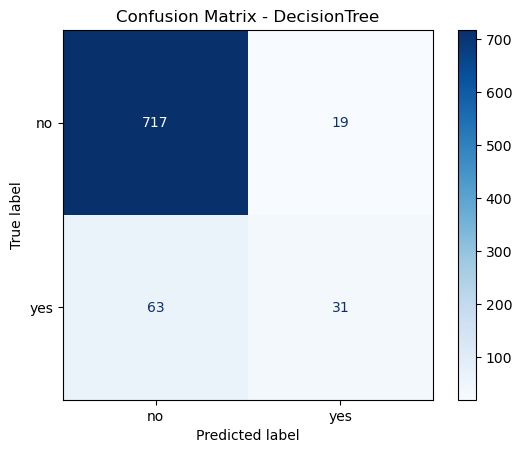

/var/folders/90/59xrx649681ff4_fhrkjcf6h0000gn/T/ipykernel_50273/3495395887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


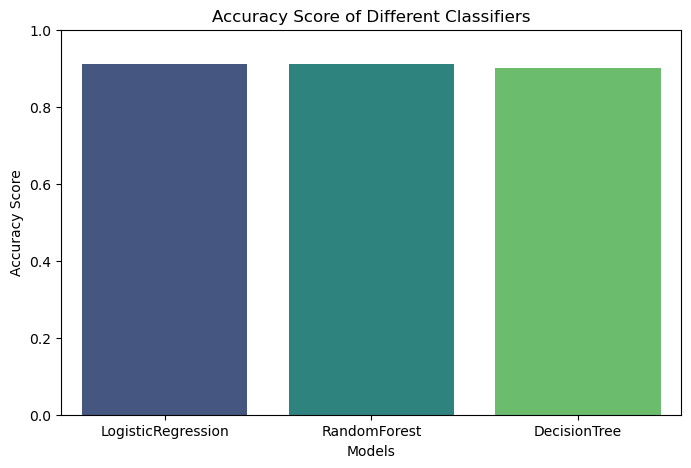

Accuracy of SVC on test set: 0.91

Classification Report for SVC:

              precision    recall  f1-score   support

          no       0.92      0.99      0.95       736
         yes       0.76      0.36      0.49        94

    accuracy                           0.91       830
   macro avg       0.84      0.67      0.72       830
weighted avg       0.90      0.91      0.90       830



<Figure size 600x400 with 0 Axes>

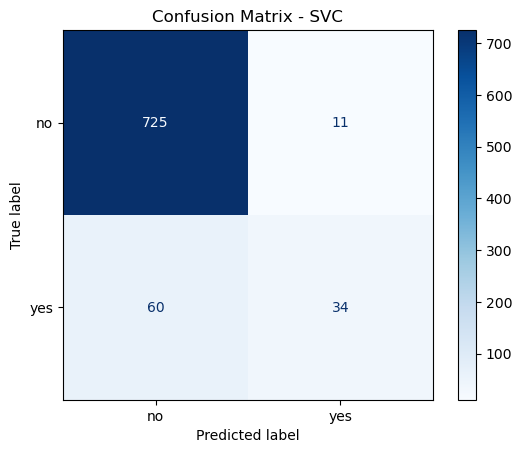

/var/folders/90/59xrx649681ff4_fhrkjcf6h0000gn/T/ipykernel_50273/3495395887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


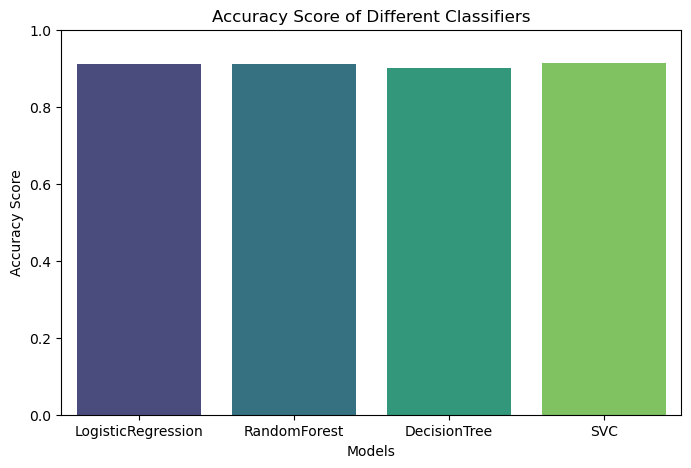

Accuracy of KNN on test set: 0.90

Classification Report for KNN:

              precision    recall  f1-score   support

          no       0.93      0.96      0.95       736
         yes       0.59      0.40      0.48        94

    accuracy                           0.90       830
   macro avg       0.76      0.68      0.71       830
weighted avg       0.89      0.90      0.89       830



<Figure size 600x400 with 0 Axes>

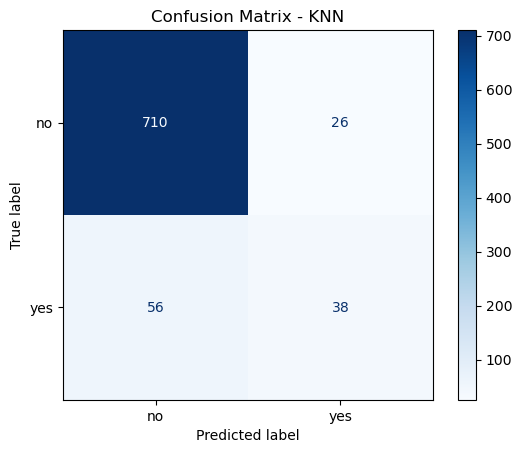

/var/folders/90/59xrx649681ff4_fhrkjcf6h0000gn/T/ipykernel_50273/3495395887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


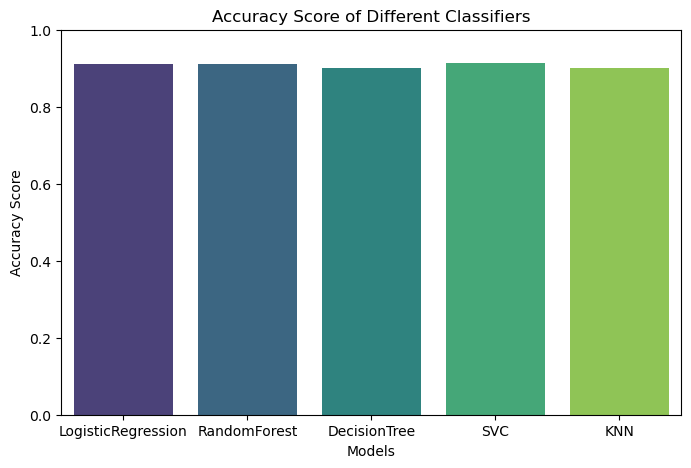

In [102]:
# Now lets try with the log transformed data.
df_new = X.copy()
df_new['balance'] = np.log1p(df_new['balance'])
df_new.dropna(inplace=True)

data = df_new.drop(columns={'subscribed'}, axis=1)
target = df_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.02, random_state=42)

non_num_list = X.select_dtypes(include=['object']).columns.to_list()
num_list =  X.select_dtypes(exclude=['object']).columns.to_list()
non_num_list.remove('subscribed')
num_list.remove('balance')

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())                  # Scale numerical features
        ]), num_list),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_num_list)  # One-hot encode categorical feature
    ]
)


# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(C=1.0, solver='liblinear', max_iter=3000),
    'RandomForest': RandomForestClassifier(max_depth=20),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, min_samples_split=2),
    'SVC': SVC(C=10, gamma='auto'),
    'KNN': KNeighborsClassifier()
}




results = {}

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    # Create the pipeline with the model
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),  # Preprocessing step
        ('classifier', model)                  # Classifier model
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')
    
    print(f'\nClassification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))


    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    
    plt.figure(figsize=(6, 4))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Plot accuracy scores for each model
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score of Different Classifiers')
    plt.show()